In [10]:
# !pip install torch torchvision

In [2]:
import torch
import torchvision
import torch.nn as nn
import sklearn.preprocessing as sk
import matplotlib.pyplot as plt
import random

In [3]:
train_data = torchvision.datasets.MNIST('mnist', 
                                        train=True, 
                                        download=True,
                                        transform=torchvision.transforms.Compose([torchvision.transforms.ToTensor()]))
test_data = torchvision.datasets.MNIST('mnist',
                                       train=False,
                                       download=True,
                                       transform=torchvision.transforms.Compose([torchvision.transforms.ToTensor()]))

train_loader = torch.utils.data.DataLoader(dataset=train_data, batch_size=1, shuffle=True)
validation_loader = torch.utils.data.DataLoader(dataset=test_data, batch_size=1, shuffle=False)

In [4]:
epochs = 5
alpha = 0.01
destruct = True
destruction_rate = 3

In [5]:
weights0 = torch.rand([784, 392])
for epoch in range(epochs):
    for x, y in train_loader:
        test_vector = x[0][0]
        
        if destruct:
            for it in range(destruction_rate):
                erase = random.randint(1, 27)
                test_vector[erase] = 0
        
        test_vector = test_vector.view(1, 784)
        
        h0_prob = torch.sigmoid(torch.mm(test_vector, weights0))
        h0_state = torch.relu((h0_prob - torch.rand(h0_prob.size())).sign())

        v1_prob = torch.sigmoid(torch.mm(h0_state, weights0.T)) 
        v1_state = torch.relu((v1_prob - torch.rand(v1_prob.size())).sign())

        h1_prob = torch.sigmoid(torch.mm(v1_state, weights0))
        h1_state = torch.relu((h1_prob - torch.rand(h1_prob.size())).sign())

        weights_delta = torch.mm(test_vector.T, h0_prob) - torch.mm(v1_state.T, h1_prob)
        weights0 = weights0 + alpha * weights_delta

In [6]:
weights1 = torch.rand([392, 196])
for epoch in range(epochs):
    for x, y in train_loader:
        test_vector = x[0][0]
        
        if destruct:
            for it in range(destruction_rate):
                erase = random.randint(1, 27)
                test_vector[erase] = 0
        
        test_vector = test_vector.view(1, 784)
        
        h0_prob = torch.sigmoid(torch.mm(test_vector, weights0))
        h0_state = torch.relu((h0_prob - torch.rand(h0_prob.size())).sign())

        v1_prob = torch.sigmoid(torch.mm(h0_state, weights1)) 
        v1_state = torch.relu((v1_prob - torch.rand(v1_prob.size())).sign())

        h1_prob = torch.sigmoid(torch.mm(v1_state, weights1.T))
        h1_state = torch.relu((h1_prob - torch.rand(h1_prob.size())).sign())
        
        v2_prob = torch.sigmoid(torch.mm(h1_state, weights1)) 
        v2_state = torch.relu((v2_prob - torch.rand(v2_prob.size())).sign())

        weights_delta = torch.mm(h0_state.T, v1_prob) - torch.mm(h1_state.T, v2_prob)
        weights1 = weights1 + alpha * weights_delta

In [7]:
weights2 = torch.rand([196, 98])
for epoch in range(epochs):
    for x, y in train_loader:
        test_vector = x[0][0]
        
        if destruct:
            for it in range(destruction_rate):
                erase = random.randint(1, 27)
                test_vector[erase] = 0
        
        test_vector = test_vector.view(1, 784)
        
        h0_prob = torch.sigmoid(torch.mm(test_vector, weights0))
        h0_state = torch.relu((h0_prob - torch.rand(h0_prob.size())).sign())

        v1_prob = torch.sigmoid(torch.mm(h0_state, weights1)) 
        v1_state = torch.relu((v1_prob - torch.rand(v1_prob.size())).sign())

        h1_prob = torch.sigmoid(torch.mm(v1_state, weights2))
        h1_state = torch.relu((h1_prob - torch.rand(h1_prob.size())).sign())
        
        v2_prob = torch.sigmoid(torch.mm(h1_state, weights2.T)) 
        v2_state = torch.relu((v2_prob - torch.rand(v2_prob.size())).sign())
        
        h2_prob = torch.sigmoid(torch.mm(v2_state, weights2))
        h2_state = torch.relu((h2_prob - torch.rand(h2_prob.size())).sign())

        weights_delta = torch.mm(v1_state.T, h1_prob) - torch.mm(v2_state.T, h2_prob)
        weights2 = weights2 + alpha * weights_delta

In [ ]:
model = nn.Sequential(nn.Linear(98, 49),
                      nn.Sigmoid()

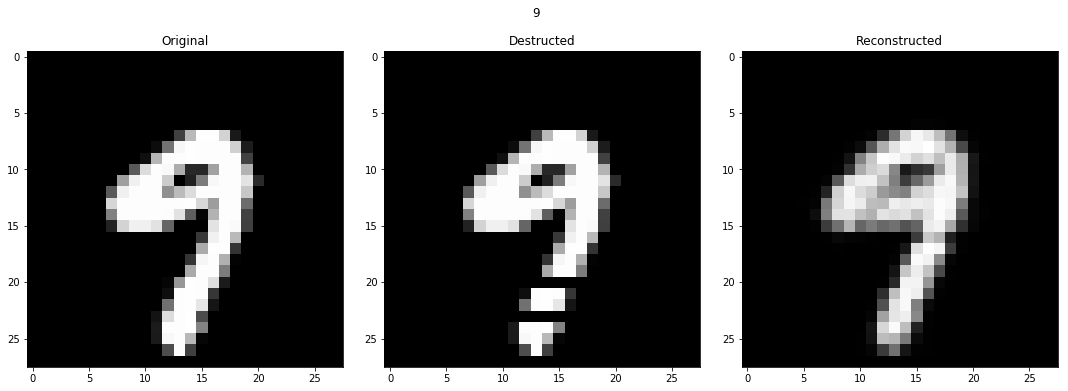

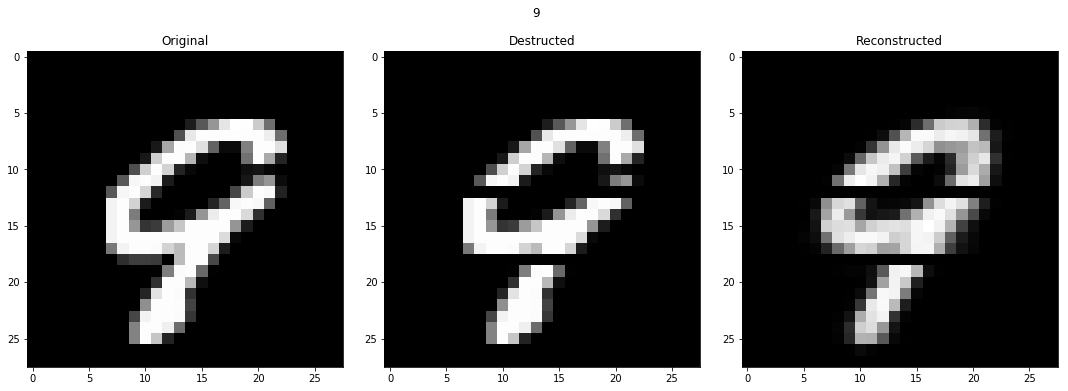

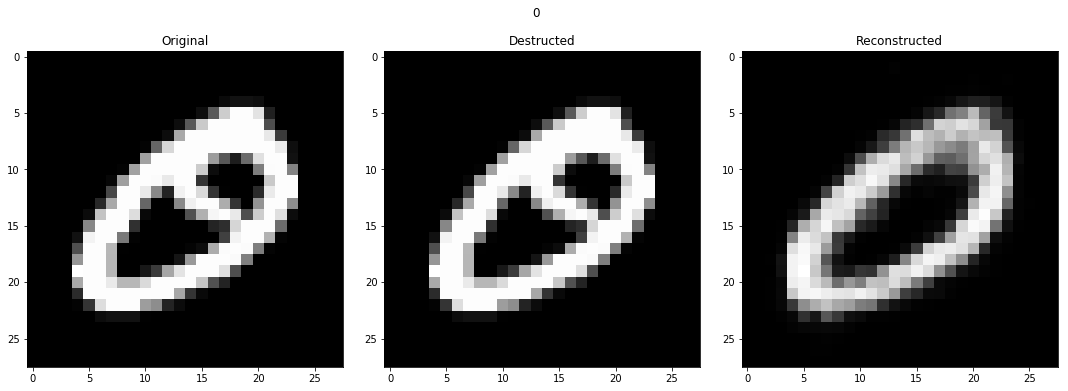

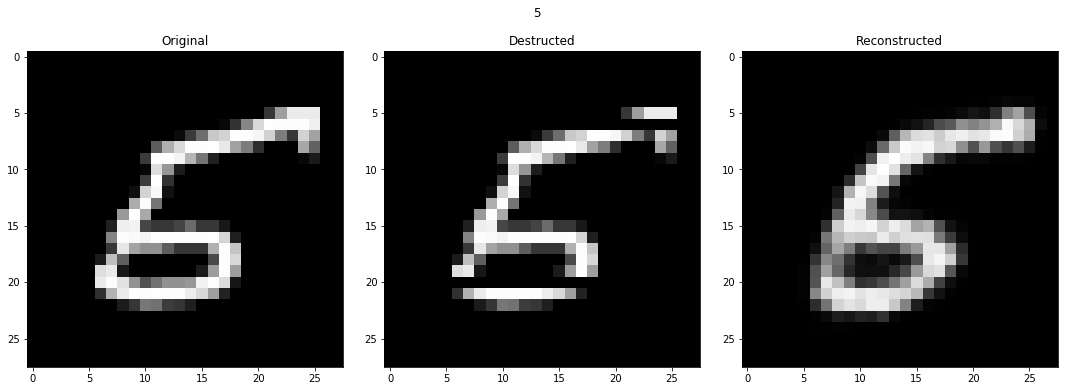

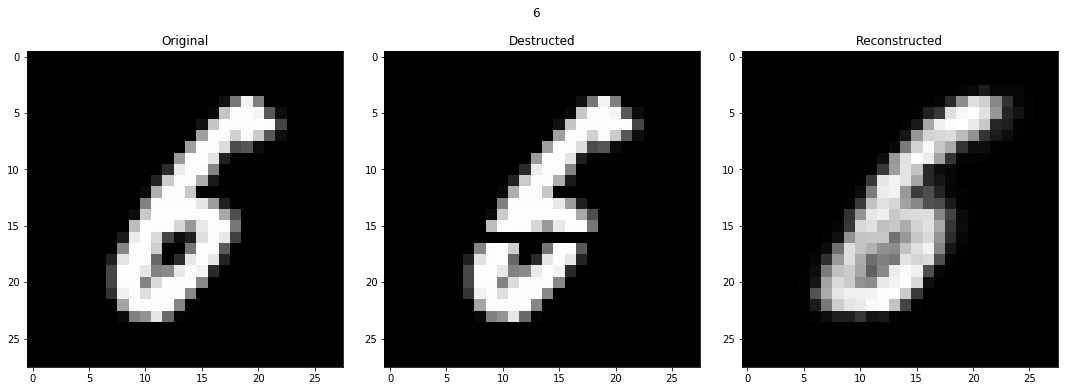

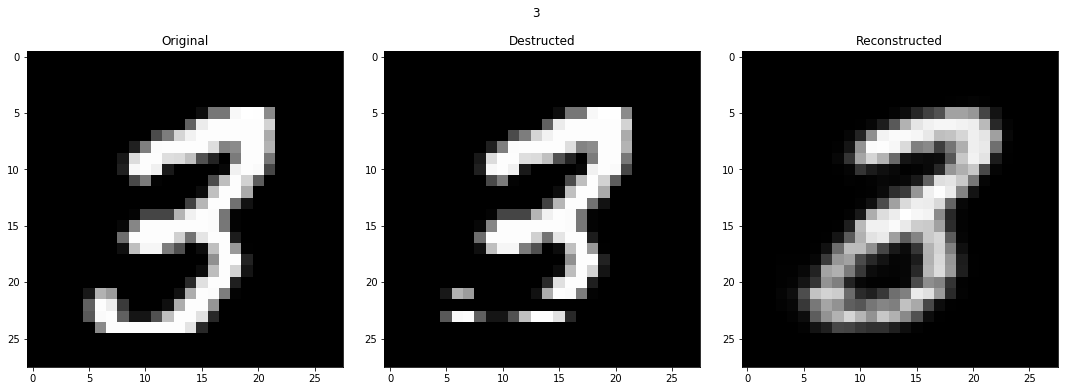

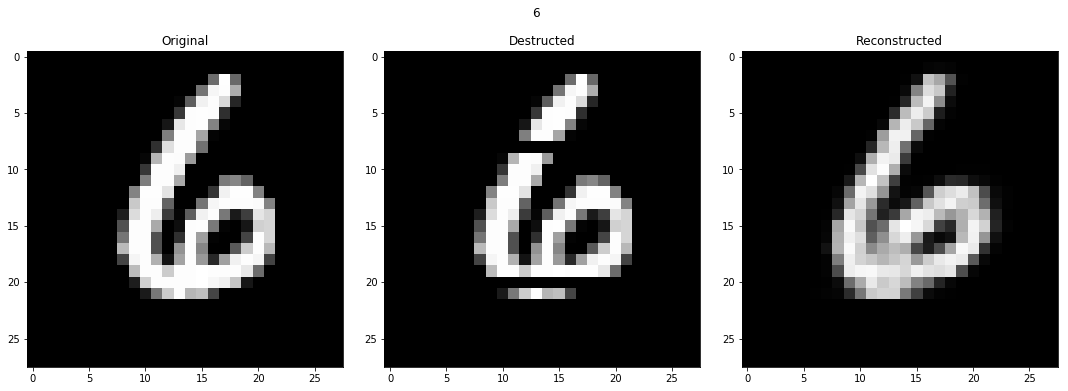

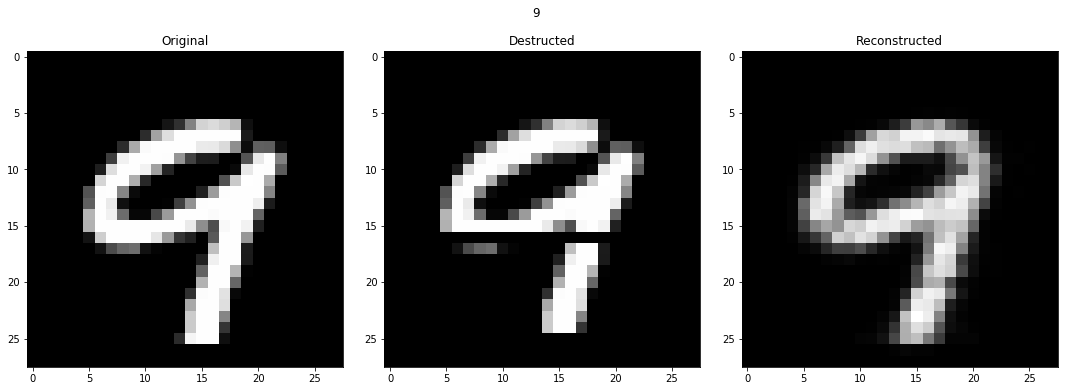

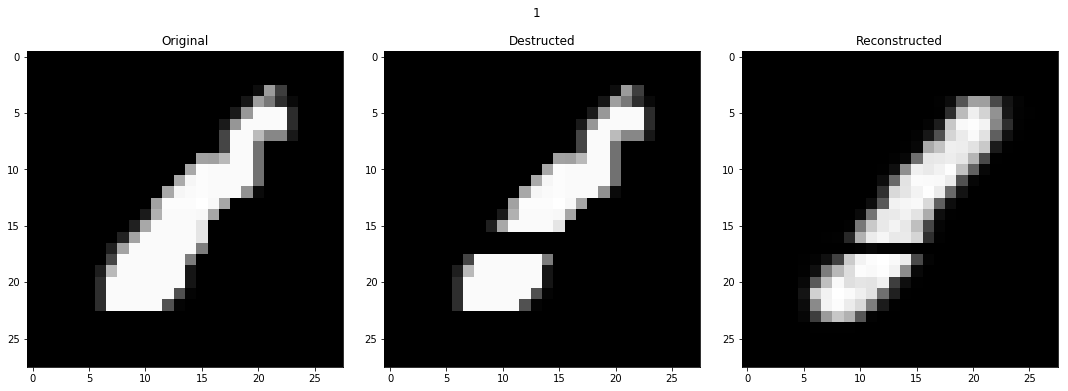

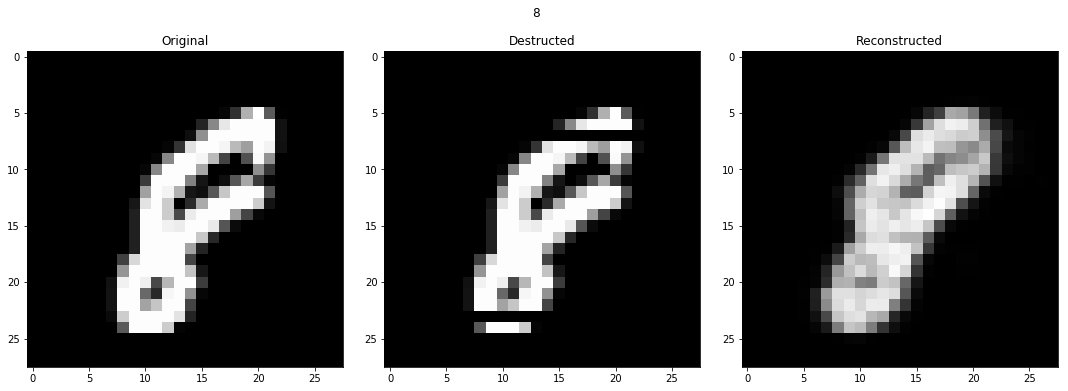

In [19]:
counter = 0
for x, title in train_loader:
    f, axarr = plt.subplots(1,3)
    axarr[0].imshow(x[0][0], cmap='gray')
    axarr[0].set_title('Original')
    
    f.suptitle(title.tolist()[0])
    f.set_size_inches(15, 15)
    f.tight_layout()
    f.subplots_adjust(bottom=0.6)
    
    broken = x[0][0]
    for it in range(destruction_rate):
        erase = random.randint(1, 27)
        broken[erase] = 0
    axarr[1].imshow(broken, cmap='gray')
    axarr[1].set_title('Destructed')
    
    v0 = broken.view(1, 784)
    h0 = torch.sigmoid(torch.mm(v0, weights0))
    v1 = torch.sigmoid(torch.mm(h0, weights1))
    h1 = torch.sigmoid(torch.mm(v1, weights2))
    v2 = torch.sigmoid(torch.mm(h1, weights2.T))
    h2 = torch.sigmoid(torch.mm(v2, weights1.T))
    v3 = torch.sigmoid(torch.mm(h2, weights0.T)).view(28, 28)

    axarr[2].imshow(v3, cmap='gray')
    axarr[2].set_title('Reconstructed')
    
    plt.show()
    print('\n')
    
    counter += 1
    if counter >= 10:
        break

In [9]:
%%javascript
Jupyter.notebook.execute_cells([0])

<IPython.core.display.Javascript object>